In [1]:
import pandas as pd #For Importing and manipulating Dataset
import numpy as np #For numerical operations
import matplotlib.pyplot as plt #For data visualization
import seaborn as sb #For good visualizations
from sklearn.model_selection import train_test_split #For spliting dataset in train test
from sklearn.preprocessing import StandardScaler #For scalling inputs
import matplotlib as mpl
%matplotlib inline
sb.set()

In [2]:
raw_dataset = pd.read_csv('Bengaluru_House_Data.csv') # importing Dataset

In [3]:
raw_dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
raw_dataset.groupby('area_type')['area_type'].agg('count') # counting how many types of areas are there

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
raw_dataset = raw_dataset.drop(['availability','society','area_type'],axis =1) # Dropping un-necessary columns

In [6]:
raw_dataset.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
raw_dataset.isnull().sum() #checking for nulls

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [8]:
raw_dataset.columns.values

array(['location', 'size', 'total_sqft', 'bath', 'balcony', 'price'],
      dtype=object)

In [9]:
# Replacing Null values in dataset with mean of those columns
no_null = ['bath', 'balcony']
for column in no_null:
    mean = int(raw_dataset[column].mean(skipna=True))
    raw_dataset[column] = raw_dataset[column].replace(np.NaN, mean)

In [10]:
raw_dataset.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
balcony        0
price          0
dtype: int64

In [11]:
raw_dataset = raw_dataset.dropna(axis=0)

In [12]:
raw_dataset.isnull().sum() # Ensuring No null values

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [13]:
raw_dataset['BHK'] = raw_dataset['size'].apply(lambda x : int(x.split(' ')[0])) # Removing string 'bhk' from Size column

In [14]:
raw_dataset.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [15]:
raw_dataset = raw_dataset.drop(['size'],axis=1) #We do not require Size column as we have BHK column now
raw_dataset.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [16]:
cols = ['location', 'BHK', 'total_sqft', 'bath', 'balcony', 'price']
raw_dataset = raw_dataset[cols] # Rearranging columns.

In [17]:
raw_dataset.head()

,location,BHK,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Uttarahalli,3,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Kothanur,2,1200,2.0,1.0,51.00


In [18]:
raw_dataset['total_sqft'].unique() # Finding unique values for total_sqft
# As we can observe there are some values which are in sort of range like 1133-1384

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
raw_dataset[raw_dataset.BHK > 10]
# Rocords having more than 10 BHK

,location,BHK,total_sqft,bath,balcony,price
459,1 Giri Nagar,11,5000,9.0,3.0,360.0
1718,2Electronic City Phase II,27,8000,27.0,0.0,230.0
1768,1 Ramamurthy Nagar,11,1200,11.0,0.0,170.0
3379,1Hanuman Nagar,19,2000,16.0,1.0,490.0
3609,Koramangala Industrial Layout,16,10000,16.0,1.0,550.0
3853,1 Annasandrapalya,11,1200,6.0,3.0,150.0
4684,Munnekollal,43,2400,40.0,0.0,660.0
4916,1Channasandra,14,1250,15.0,0.0,125.0
6533,Mysore Road,12,2232,6.0,2.0,300.0
7979,1 Immadihalli,11,6000,12.0,1.0,150.0


In [20]:
# Function to check if value is float or not.
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
raw_dataset[~raw_dataset['total_sqft'].apply(is_float)].head(20)
#Applying function to Total_Sqft column to make sure values are float or not

,location,BHK,total_sqft,bath,balcony,price
30,Yelahanka,4,2100 - 2850,4.0,0.0,186.000
56,Devanahalli,4,3010 - 3410,2.0,1.0,192.000
81,Hennur Road,4,2957 - 3450,2.0,1.0,224.500
122,Hebbal,4,3067 - 8156,4.0,0.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,0.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,0.0,43.490
188,KR Puram,2,1015 - 1540,2.0,0.0,56.800
224,Devanahalli,3,1520 - 1740,2.0,1.0,74.820
410,Kengeri,1,34.46Sq. Meter,1.0,0.0,18.500
549,Hennur Road,2,1195 - 1440,2.0,0.0,63.770


In [22]:
# Function for Converting range value to the float values which are their mean
def sqrft_to_num(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [23]:
sqrft_to_num('1287')

1287.0

In [24]:
sqrft_to_num('4400 - 6800')

5600.0

In [25]:
raw_dataset['total_sqft'] = raw_dataset['total_sqft'].apply(sqrft_to_num) 
# Converting range values from total_sqft column to the float values which are their mean

In [26]:
raw_dataset.loc[56]

location      Devanahalli
BHK                     4
total_sqft         3210.0
bath                  2.0
balcony               1.0
price               192.0
Name: 56, dtype: object

In [27]:
raw_dataset.head()

,location,BHK,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Kothanur,2,1200.0,2.0,1.0,51.00


In [28]:
raw_dataset.isnull().sum()

location       0
BHK            0
total_sqft    46
bath           0
balcony        0
price          0
dtype: int64

In [29]:
raw_dataset = raw_dataset.dropna(axis=0)
#Dropping null values

In [30]:
raw_dataset.isnull().sum()

location      0
BHK           0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [31]:
raw_dataset.head()

,location,BHK,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Kothanur,2,1200.0,2.0,1.0,51.00


In [32]:
raw_dataset['price_per_sqft'] = raw_dataset['price']*100000/ raw_dataset['total_sqft']
#Making column to check price per square feet

In [33]:
raw_dataset.head()

,location,BHK,total_sqft,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000


In [34]:
len(raw_dataset.location.unique())
# there are 1298 unique locations

1298

In [35]:
raw_dataset.location = raw_dataset.location.apply(lambda x : x.strip())
#Making sure Location String value has spaces in its names
location_stats = raw_dataset.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats.head(20)
#Counting Each location and its corresponding records

location
Whitefield                  538
Sarjapur  Road              397
Electronic City             304
Kanakpura Road              271
Thanisandra                 236
Yelahanka                   212
Uttarahalli                 186
Hebbal                      177
Marathahalli                175
Raja Rajeshwari Nagar       171
Hennur Road                 152
Bannerghatta Road           151
7th Phase JP Nagar          148
Haralur Road                142
Electronic City Phase II    132
Rajaji Nagar                107
Chandapura                  100
Bellandur                    96
KR Puram                     91
Electronics City Phase 1     88
Name: location, dtype: int64

In [36]:
len(location_stats[location_stats<=10])
#Getting locations with less than 10 associated records

1047

In [37]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [38]:
location_stats_less_than_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [39]:
raw_dataset.location = raw_dataset.location.apply(lambda x : 'Other' if x in location_stats_less_than_10 else x)
# Locations which are having less than 10 records are merged and converted to single catagory called 'Other'

In [40]:
len(raw_dataset.location.unique())

241

In [41]:
raw_dataset.head(20)

,location,BHK,total_sqft,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000
5,Whitefield,2,1170.0,2.0,1.0,38.00,3247.863248
6,Old Airport Road,4,2732.0,4.0,1.0,204.00,7467.057101
7,Rajaji Nagar,4,3300.0,4.0,1.0,600.00,18181.818182
8,Marathahalli,3,1310.0,3.0,1.0,63.25,4828.244275
9,Other,6,1020.0,6.0,1.0,370.00,36274.509804


In [42]:
#we dont want our number of bedrooms and their size in square foot to mismatch
#so here we are taking 300sqft per bedroom as standard measure to sort out untrue values

#first we take values of bedrooms who have square footage of less than 300 per bedroom
raw_dataset[raw_dataset.total_sqft/raw_dataset.BHK<300]

,location,BHK,total_sqft,bath,balcony,price,price_per_sqft
9,Other,6,1020.0,6.0,1.0,370.0,36274.509804
45,HSR Layout,8,600.0,9.0,1.0,200.0,33333.333333
58,Murugeshpalya,6,1407.0,4.0,1.0,150.0,10660.980810
68,Devarachikkanahalli,8,1350.0,7.0,0.0,85.0,6296.296296
70,Other,3,500.0,3.0,2.0,100.0,20000.000000
...,...,...,...,...,...,...,...
13277,Other,7,1400.0,7.0,1.0,218.0,15571.428571
13279,Other,6,1200.0,5.0,1.0,130.0,10833.333333
13281,Margondanahalli,5,1375.0,5.0,1.0,125.0,9090.909091
13303,Vidyaranyapura,5,774.0,5.0,3.0,70.0,9043.927649


In [43]:
raw_dataset.shape

(13257, 7)

In [44]:
#Assuming that per bed room there is 300 sq_ft area 
#removing all those records who are having less area than 300 sq_ft for single bedroom
raw_dataset = raw_dataset[~(raw_dataset.total_sqft/raw_dataset.BHK<300)]

In [45]:
raw_dataset.shape

(12513, 7)

C:\Users\Suyash\miniconda33\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

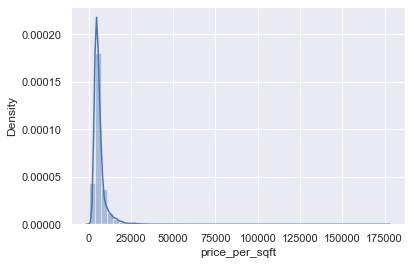

In [46]:
#Plotting displot to find outliers for prices
sb.distplot(raw_dataset.price_per_sqft)

In [47]:
raw_dataset.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [48]:
#as we are creating more of general model we cannot have prices as low as 267 rs per sqrft and as high as 176470 rs pe sqrft
#we will try to remove those outliers
# Here we find mean of a price per square foot for each location and remove those outliers who lie boyond one standard deviation.
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(df.price_per_sqft)
        st = np.std(df.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft < (m+st)) & (subdf.price_per_sqft > (m-st))]
        df_out = pd.concat([df_out,reduced_df], ignore_index = True)
    return df_out

In [49]:
raw_dataset_2 = raw_dataset
raw_dataset_2 = remove_pps_outliers(raw_dataset_2)

In [50]:
raw_dataset_2.shape

(11344, 7)

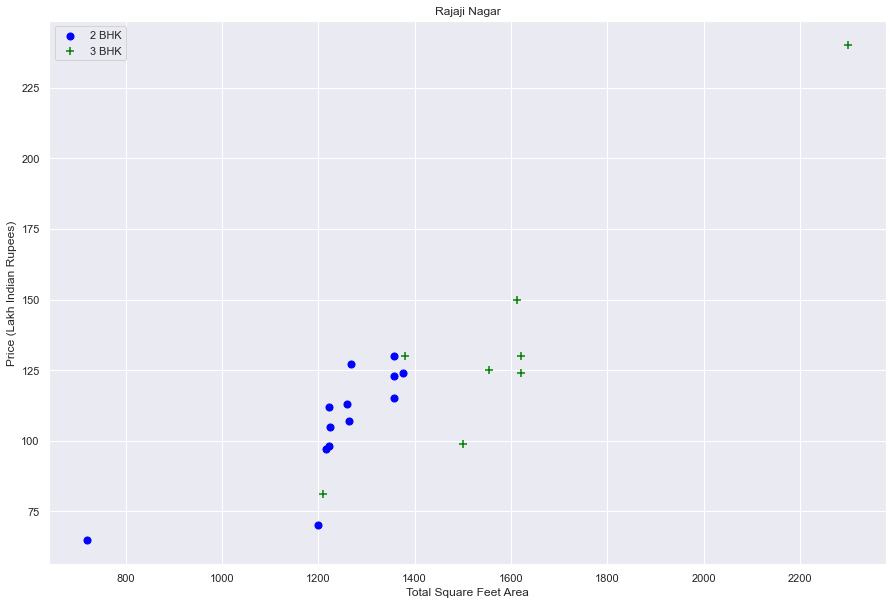

In [51]:
#the price of an apartment having less Square feet area should not be more than the price of an apartment having more number of beds if they are in same location
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    mpl.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(raw_dataset_2,"Rajaji Nagar")

In [52]:
#here we can see 2 bed apartments are having more price than 3 bed apartments having almost same area and in same location.

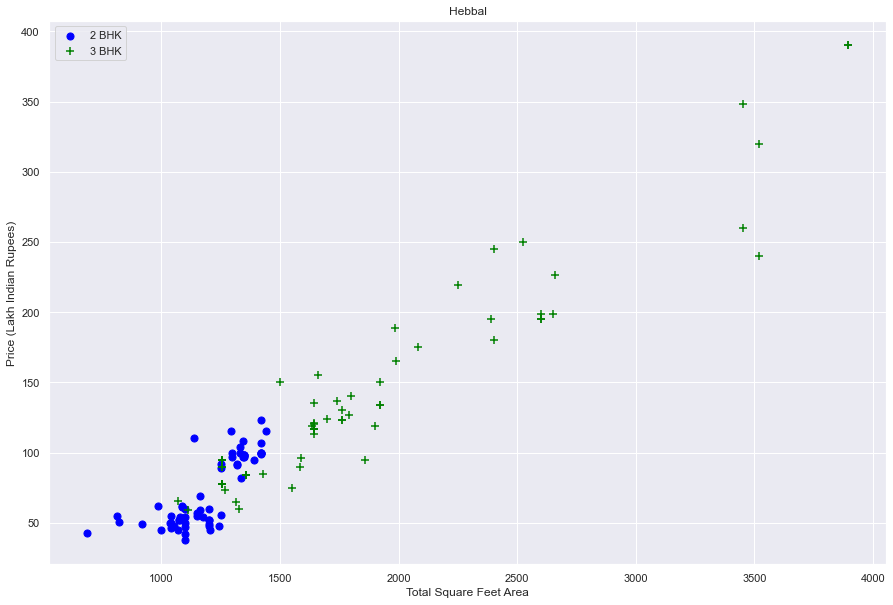

In [53]:
plot_scatter_chart(raw_dataset_2,"Hebbal")

In [54]:
# This function helps in removing the Records of apartment who have less price than the mean price of lesser bedroom apartments.
# Example : It will remove those 2BHK records who have price less than the mean of 1BHK records in that location.
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
raw_dataset_3 = remove_bhk_outliers(raw_dataset_2)

raw_dataset_3.shape

(8130, 7)

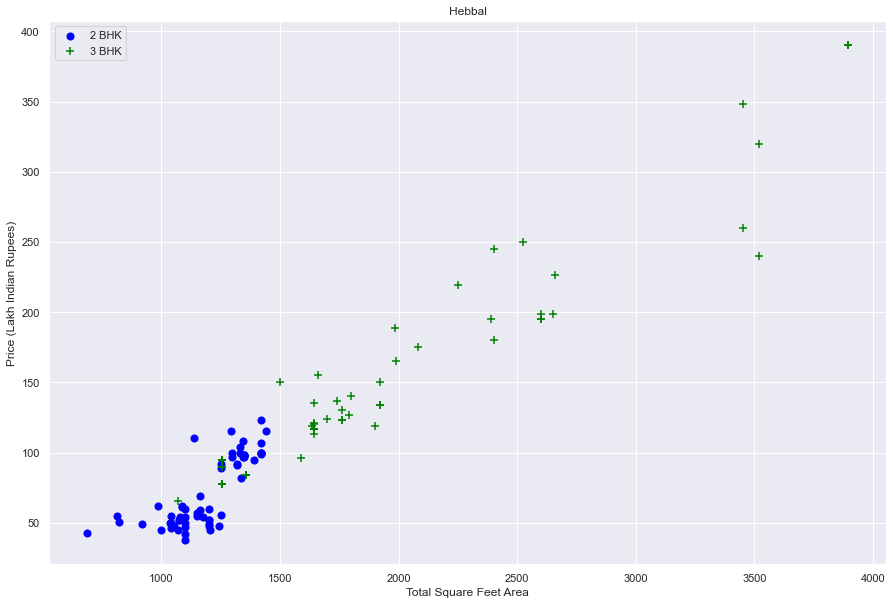

In [55]:
plot_scatter_chart(raw_dataset_3,"Hebbal")

In [56]:
# As we can see majority of the data points are removed having less price but more area at same location

Text(0, 0.5, 'Count')

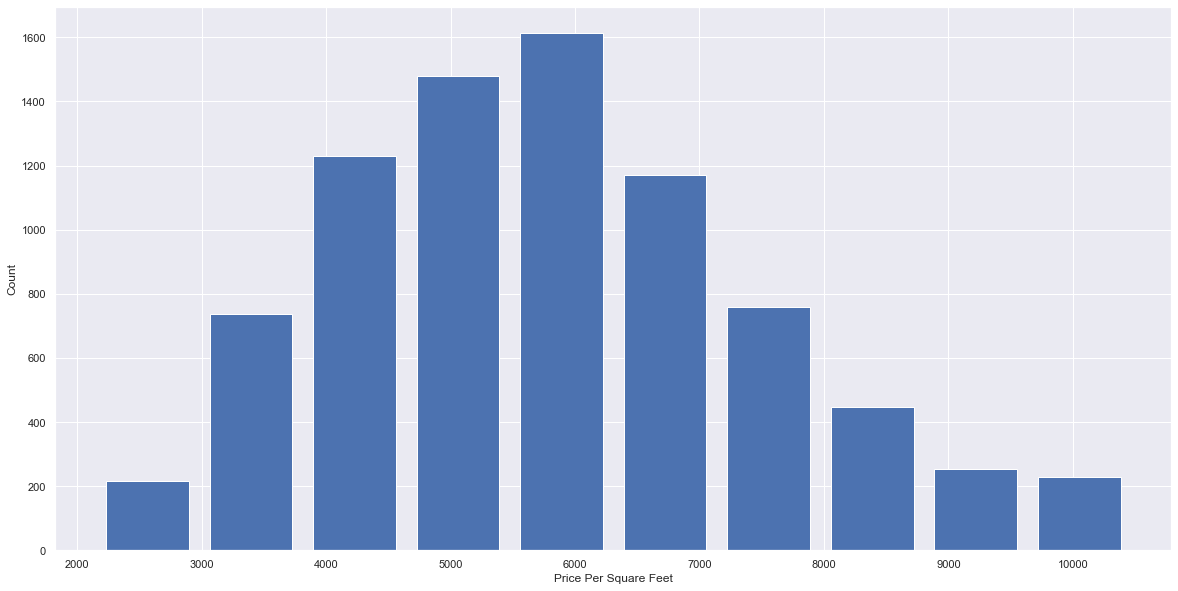

In [57]:
mpl.rcParams["figure.figsize"] = (20,10)
plt.hist(raw_dataset_3.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

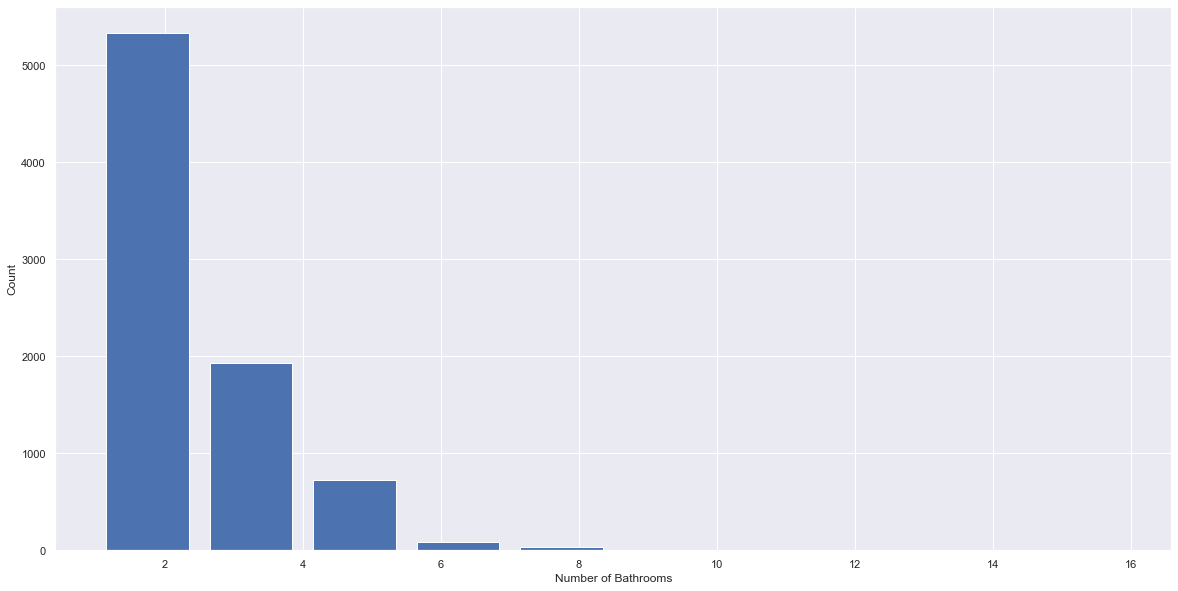

In [58]:
plt.hist(raw_dataset_3.bath, rwidth = 0.8)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.show()

In [59]:
raw_dataset_3[raw_dataset_3.bath > raw_dataset_3.BHK+2]
# Here we can see that number of baths is more than number of beds

,location,BHK,total_sqft,bath,balcony,price,price_per_sqft
1867,Chikkabanavar,4,2460.0,7.0,2.0,80.0,3252.032520
6108,Nagasandra,4,7000.0,8.0,1.0,450.0,6428.571429
6717,Other,6,11338.0,9.0,1.0,1000.0,8819.897689
9969,Thanisandra,3,1806.0,6.0,2.0,116.0,6423.034330


In [60]:
raw_dataset_4 = raw_dataset_3[~(raw_dataset_3.bath > raw_dataset_3.BHK+2)]
# dropping all those records who are having number of baths significantly more than number of beds

In [61]:
raw_dataset_4.shape

(8126, 7)

In [62]:
#Now the Preprocessing is almost done and we will drop some features which are not necessary for model creation.

In [63]:
raw_dataset_4 = raw_dataset_4.drop(['price_per_sqft'],axis = 'columns')

In [64]:
raw_dataset_4.head(10)

,location,BHK,total_sqft,bath,balcony,price
0,1st Block Jayanagar,2,1000.0,3.0,2.0,60.0
1,1st Block Jayanagar,3,1760.0,3.0,1.0,115.0
3,1st Phase JP Nagar,3,1875.0,3.0,1.0,167.0
4,1st Phase JP Nagar,5,1500.0,5.0,1.0,85.0
5,1st Phase JP Nagar,3,2065.0,4.0,1.0,210.0
6,1st Phase JP Nagar,3,2024.0,3.0,1.0,157.0
7,1st Phase JP Nagar,2,1394.0,2.0,1.0,100.0
8,1st Phase JP Nagar,2,1077.0,2.0,2.0,93.0
9,1st Phase JP Nagar,1,840.0,2.0,2.0,50.0
10,1st Phase JP Nagar,3,1590.0,3.0,3.0,131.0


In [65]:
#Now we will create  dummies for location columns
dummies = pd.get_dummies(raw_dataset_4.location, drop_first = True)

In [66]:
dummies

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11333,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
raw_dataset_5 = pd.concat([dummies,raw_dataset_4],axis='columns')

In [68]:
raw_dataset_5.head(5)

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,location,BHK,total_sqft,bath,balcony,price
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1st Block Jayanagar,2,1000.0,3.0,2.0,60.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1st Block Jayanagar,3,1760.0,3.0,1.0,115.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1st Phase JP Nagar,3,1875.0,3.0,1.0,167.0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1st Phase JP Nagar,5,1500.0,5.0,1.0,85.0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1st Phase JP Nagar,3,2065.0,4.0,1.0,210.0


In [69]:
raw_dataset_5 = raw_dataset_5.drop(['location'],axis=1)

In [70]:
raw_dataset_5.head(5)

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,BHK,total_sqft,bath,balcony,price
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1000.0,3.0,2.0,60.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,1760.0,3.0,1.0,115.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,1875.0,3.0,1.0,167.0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,1500.0,5.0,1.0,85.0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,2065.0,4.0,1.0,210.0


In [71]:
raw_dataset_5.shape

(8126, 244)

In [72]:
data_preprocessed = raw_dataset_5

In [73]:
data_preprocessed.to_csv('data_preprocessed.csv',index=False) # Saving Dataset in CSV fromat